In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


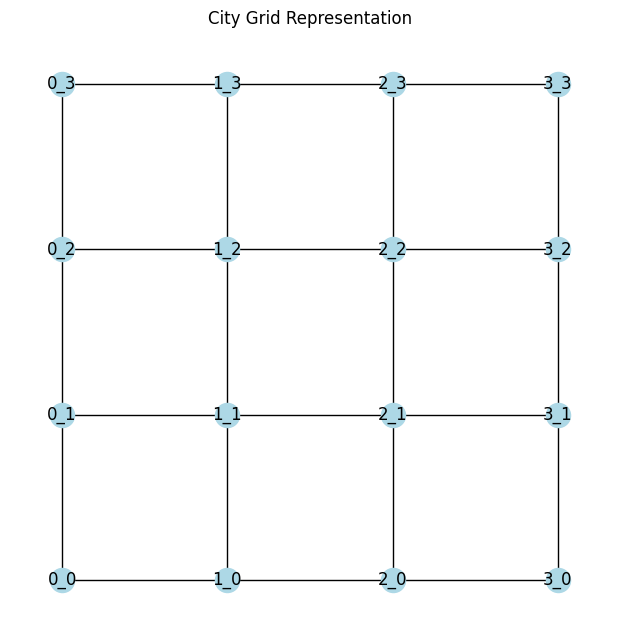

In [5]:
def create_city_grid(grid_size):
    G = nx.grid_2d_graph(grid_size, grid_size)
    mapping = dict(((x, y), f'{x}_{y}') for x, y in G.nodes())
    G = nx.relabel_nodes(G, mapping)
    pos = {node: (int(node.split('_')[0]), int(node.split('_')[1])) for node in G.nodes()}
    return G, pos

city_size = 4   # example grid size
G, pos = create_city_grid(city_size)

plt.figure(figsize=(6,6))
nx.draw(G, pos, with_labels=True, node_color='lightblue')
plt.title('City Grid Representation')
plt.show()


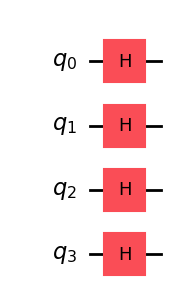

In [11]:
def galton_board_circuit(num_steps):
    qc = QuantumCircuit(num_steps)
    for i in range(num_steps):
        qc.h(i)
    return qc

num_steps = 4
qc = galton_board_circuit(num_steps)
qc.draw('mpl')



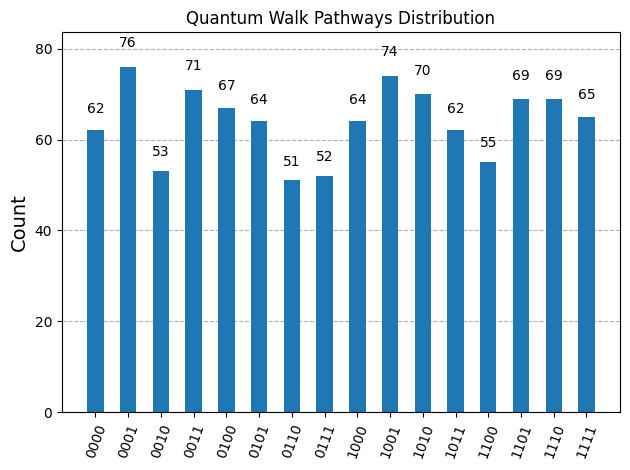

In [12]:
def quantum_walk_simulation(num_steps, shots =1024):
    qc = galton_board_circuit(num_steps)
    qc.measure_all()
    backend = AerSimulator()
    job = backend.run(qc, shots = shots)
    counts = job.result().get_counts()
    return counts

counts = quantum_walk_simulation(num_steps)
plot_histogram(counts, title= "Quantum Walk Pathways Distribution")

# Mapping Quantum Results to Traffic 

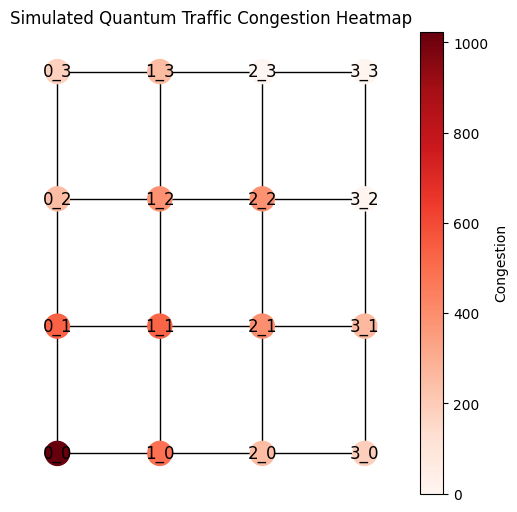

In [17]:
import matplotlib as mpl 
def bitstring_to_path(bitstring, grid_size):
    x, y = 0,0
    path = [(x,y)]
    for b in bitstring[::-1]: 
        if b== '0' and x+1 < grid_size:
            x += 1
        elif b == '1' and y+1 < grid_size:
            y += 1
        path.append((x,y))
    return path 

traffic = {}

for path_str , freq in counts.items(): 
    path = bitstring_to_path(path_str, city_size)
    for node in path: 
        traffic[node] = traffic.get(node, 0) + freq

fig, ax = plt.subplots(figsize=(6,6))  # Create a figure and axes
nx.draw(G, pos, node_color=node_colors, cmap=plt.cm.Reds, with_labels=True, ax=ax)

sm = mpl.cm.ScalarMappable(cmap=plt.cm.Reds)
sm.set_array(node_colors)  # Connect actual color data
fig.colorbar(sm, ax=ax, label="Congestion")  # Attach colorbar to the axes

plt.title('Simulated Quantum Traffic Congestion Heatmap')
plt.show()




# Classical Monte Carlo Comparison

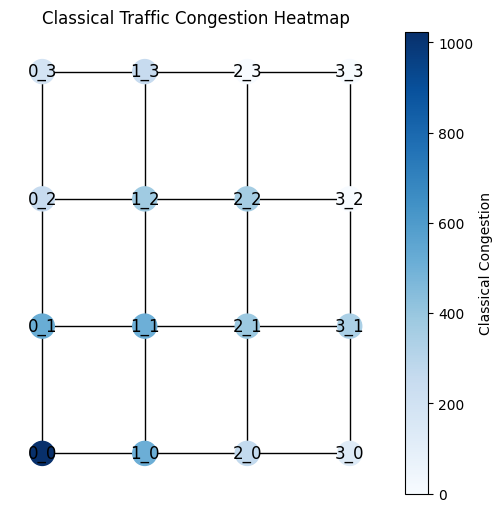

In [19]:
def classical_walk_simulation(num_steps, shots=1024):
    traffic = {}
    for _ in range(shots):
        x, y = 0, 0
        path = [(x, y)]
        for _ in range(num_steps):
            if np.random.rand() > 0.5 and x+1 < city_size:
                x += 1
            elif y+1 < city_size:
                y += 1
            path.append((x, y))
        for node in path:
            traffic[node] = traffic.get(node, 0) + 1
    return traffic

fig, ax = plt.subplots(figsize=(6,6))
nx.draw(G, pos, node_color=node_colors_classical, cmap=plt.cm.Blues, with_labels=True, ax=ax)

sm = mpl.cm.ScalarMappable(cmap=plt.cm.Blues)
sm.set_array(node_colors_classical)
fig.colorbar(sm, ax=ax, label="Classical Congestion")

plt.title('Classical Traffic Congestion Heatmap')
plt.show()
